# ML-2. Предобработка данных 
## Юнит 3. Введение в машинное обучение 
### Skillfactory: DST-10
---
### 2.3. Типы данных. Практика

In [168]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt 
%matplotlib inline
PATH_to_file = '../ML_2/data/'
import os
print(os.listdir(PATH_to_file))

['data_flats.csv', 'latlons.xls', 'train.csv', 'train2.csv']


In [2]:
# Давайте для начала откроем наш файл и посмотрим на данные:
data = pd.read_csv(PATH_to_file+'data_flats.csv',sep=";")
with pd.option_context('display.max_columns', None):
    display(data.head())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,240.0,1,0,7,3,0,16,1,2.590241,1.131260,13.575119,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,5.419893,65.038716,0.274985,3.299822,1.422391,10.918587,13.100618,13.675657,15.156211,10.814172,1.676258,0.485841,3.065047,1.107594,8.148591,3.516513,2.392353,6.715026,0.884350,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,229.0,1,0,6,1,1,3,0,0.936700,0.647337,7.620630,0.635053,0.147754,0.273345,0.550690,0.065321,0.966479,3.411993,40.943917,0.065263,0.783160,9.503405,3.103996,6.444333,8.132640,8.698054,6.910568,3.424716,0.668364,2.000154,8.972823,6.127073,1.161579,2.543747,1.852560,0.686252,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,1183.0,1,0,5,1,0,0,1,2.120999,1.637996,17.351515,1.445960,0.049102,0.158072,0.374848,0.453172,0.939275,1.277658,15.331896,0.328756,3.945073,5.604800,2.927487,6.963403,8.054252,9.067885,5.752368,1.375443,0.733101,1.239304,1.978517,0.767569,1.952771,0.621357,0.841254,1.510089,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,NaN,1,0,17,6,0,11,4,1.489049,0.984537,11.565624,0.963802,0.179441,0.236455,0.078090,0.106125,0.451173,4.291432,51.497190,0.131597,1.579164,2.677824,14.606501,17.457198,18.309433,19.487005,27.892717,0.811275,0.623484,1.950317,6.483172,7.385521,4.923843,3.549558,10.903161,0.622272,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,562.0,4,2,25,2,0,10,93,1.257186,0.876620,8.266305,0.688859,0.247901,0.376838,0.258289,0.236214,0.392871,0.853960,10.247521,0.071480,0.857764,11.616653,1.721834,0.046810,0.787593,2.578671,9.155057,1.969738,0.220288,2.544696,3.975401,3.610754,0.307915,1.864637,0.991683,0.892668,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [3]:
# Для того, чтобы посмотреть на типы данных, запросим информацию о датасете:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
id                                       30469 non-null int64
full_sq                                  30469 non-null int64
life_sq                                  24086 non-null float64
floor                                    30302 non-null float64
sub_area                                 30469 non-null object
preschool_quota                          23781 non-null float64
preschool_education_centers_raion        30469 non-null int64
school_quota                             23784 non-null float64
school_education_centers_raion           30469 non-null int64
school_education_centers_top_20_raion    30469 non-null int64
hospital_beds_raion                      16029 non-null float64
healthcare_centers_raion                 30469 non-null int64
university_top_20_raion                  30469 non-null int64
sport_objects_raion                      30469 non-null int64
additional_e

### Задание
Введите название переменной, которой обозначен ординальный признак  
- ecology   

Введите название переменной, которой обозначен категориальный признак
- sub_area  

!!!Обратите внимание на типы признаков. Категориальные и ординальные чаще всего закодированы как признаки типа "object" (но помните, что иногда категориальные и ординальные могут быть закодированы и числами, поэтому в будущем всегда внимательно смотрите на полученные данные!)

### 2.6 Работа с пропусками. Практика
---
### Задание 2.6.6
Загрузите данные train.csv, найдите признак, обозначающий штат. Затем найдите значение, которое встречается чаще всего. Замените пропуски этим значением и запишите получившийся признак в переменную result.


In [39]:
# ответ для задачи 2.6.6
# обратите внимание при проверке на своем компьютере необходимо добавть путь PATH_to_file+

vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
result = vis_data.state.fillna(vis_data.state.value_counts().index[0])

FileNotFoundError: [Errno 2] File b'train.csv' does not exist: b'train.csv'

### Задание 2.6.7
Продолжим готовить к анализу наш Data set, посвященный квартирам, выставленным на продажу. Избавимся от пропусков. Просто удалять данные с пропусками довольно грубо. Однако если у вас большое количество объектов, и лишь крайне малая их доля имеет пропущенные значения, то это возможное допущение. Поступим здесь таким образом. Нас будут интересовать только те квартиры, про которые продавцы заполнили все данные. Удалите, пожалуйста, все строки, где есть хотя бы один пропуск. Сколько объектов осталось?

In [5]:
temp = len(data.dropna())
task = "2.6.7"
print(f"Ответ к заданию {task}")
print(f"объектов осталось := {temp}")

Ответ к заданию 2.6.7
объектов осталось := 13652


### 2.8. Начальная обработка. Практика
---

In [34]:
test_data = pd.DataFrame([[1, 2, np.nan], [3, np.nan, 417], 
                          [0, 10, -212]], columns=['one', 'two', 'three'])
# test_data = test_data.fillna(0)

In [35]:
scaler = MinMaxScaler()
scaler.fit_transform(test_data)

array([[0.33333333, 0.        ,        nan],
       [1.        ,        nan, 1.        ],
       [0.        , 1.        , 0.        ]])

In [10]:
scaler = StandardScaler()

array([[-0.26726124, -0.46291005, -0.26151831],
       [ 1.33630621, -0.9258201 ,  1.33438124],
       [-1.06904497,  1.38873015, -1.07286293]])

### Задание 2.8.1
К какому типу данных приводит нормализация признаков после применения StandardScaler() из sklearn?

In [13]:
type(scaler.fit_transform(test_data))

numpy.ndarray

### Задание 2.8.3
Загрузите данные train.csv, найдите признак, обозначающий баланс. Нормализуйте признак с помощью std-нормализации. Проверьте, что вы нашли нужный признак и нормализовали его подходящим методом. Метод для нормализации принимает матрицу, а не массив. В numpy можно превратить массив в матрицу с помощью reshape(). В качестве ответа укажите минимальное значение в получившемся нормализованном признаке. Ответ округлите до 5 знаков после запятой.

In [28]:
vis_data = pd.read_csv(PATH_to_file+"train.csv", encoding = 'ISO-8859-1', low_memory = False)
test_data = np.array(vis_data['balance_due'])

temp = scaler.fit_transform(test_data.reshape(-1,1)).min()
task = "2.8.3"
print(f"Ответ к заданию {task}")
print(f"объектов осталось := {round(temp,5)}")

Ответ к заданию 2.8.3
объектов осталось := -13.14733


### 2.10 Визуализация. Практика
---
### Задание 2.10.3
Загрузите данные train.csv, найдите признак, обозначающий баланс. Для приведения данных к более нормальному виду часто используют различные преобразования, например, взятие корня от признака.
Возьмите корень у положительных значений, найдите медианное и среднее значение. В качестве ответа укажите модуль разницы этих значений.

In [37]:
vis_data['balance_due_in_square'] = vis_data['balance_due'].apply(lambda x: x**0.5 if x>0 else None)

temp = abs(vis_data['balance_due_in_square'].mean()-vis_data['balance_due_in_square'].median())
task = "2.10.3"
print(f"Ответ к заданию {task}")
print(f"объектов осталось := {round(temp,6)}")

Ответ к заданию 2.10.3
объектов осталось := 0.452596


### Задание 2.10.4
1. В каком районе разброс цен самый большой?
2. В каком районе самая низкая медианная цена?

In [62]:
df = pd.read_csv(PATH_to_file+'data_flats.csv',sep=";")
new_df = df.groupby('sub_area').price_doc.agg(['min','max'])
new_df['diff'] = abs(new_df['min']-new_df['max'])

Ответ к заданию 2.10.4 пункт 1
В каком районе разброс цен самый большой? := Basmannoe	


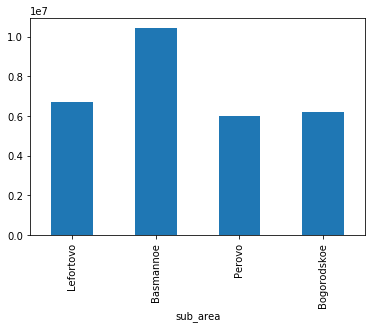

In [174]:
plt.rcParams['figure.figsize'] = (6,4)
new_df.loc[['Lefortovo', 'Basmannoe', 'Perovo', 'Bogorodskoe']].plot(kind = 'bar')

task = "2.10.4"
print(f"Ответ к заданию {task} пункт 1")
print(f"В каком районе разброс цен самый большой? := Basmannoe	")

Ответ к заданию 2.10.4 пункт 2
В каком районе самая низкая медианная цена? := Perovo	


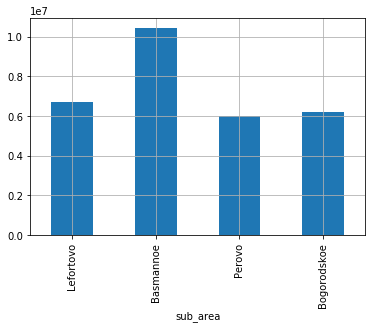

In [177]:
df.groupby('sub_area').price_doc.median().loc[['Lefortovo', 'Basmannoe', 'Perovo', 'Bogorodskoe']].plot(kind = 'bar', grid = True)
task = "2.10.4"
print(f"Ответ к заданию {task} пункт 2")
print(f"В каком районе самая низкая медианная цена? := Perovo	")

### 2.12 Feature Engineering. Практика
---
### Задание 2.12.6
Загрузите данные train.csv, найдите признак, обозначающий баланс и признак, обозначающий размер скидки. Создайте полиномиальные признаки степени 3. Посчитайте среднее значение для каждого получившегося признака. В качестве ответа укажите номер признака, который содержит максимальное среднее значение.

In [160]:
vis_data = pd.read_csv(PATH_to_file+"train.csv", encoding = 'ISO-8859-1', low_memory = False)
pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(vis_data[['balance_due', 'discount_amount']])
numColumns_mean = pd.DataFrame(poly_features).describe()[1:2].T
numColumns_mean

,mean
0,1.000000e+00
1,2.224491e+02
2,1.251668e-01
3,4.171958e+05
4,-9.855317e+00
5,1.178174e+01
6,2.042001e+09
7,1.179244e+05
8,-1.495641e+02
9,3.074176e+03


In [161]:
temp = numColumns_mean.idxmax()[0]
task = "2.12.6"
print(f"Ответ к заданию {task}")
print(f"номер признака, который содержит максимальное среднее значение := {temp}")

Ответ к заданию 2.12.6
номер признака, который содержит максимальное среднее значение := 6


### Задание 2.12.7
Загрузите данные train.csv, найдите признак, обозначающий дату, когда был выписан штраф. Найдите, сколько раз штраф был выписан на выходных и запишите это число в качестве ответа.

In [137]:
dt_ticket_issued_date = pd.to_datetime(vis_data.ticket_issued_date.dropna())
vis_data['is_weekend'] = dt_ticket_issued_date.dt.weekday > 4

temp = vis_data['is_weekend'].sum()
task = "2.12.7"
print(f"Ответ к заданию {task}")
print(f"штраф был выписан на выходных := {temp} раз")

Ответ к заданию 2.12.7
штраф был выписан на выходных := 1620 раз


### Задание 2.12.8
Ранее мы уже выяснили, что данные о квартирах не все числовые. Есть и признаки, которые содержат текстовые значения : ординальный (уровень экологии) и категориальный (район). Нам обязательно нужно перекодировать эти признаки, так как иначе мы не сможем в дальнейшем работать с этим датасетом и применять на нем какие-то математические алгоритмы.  
Ординальный признак мы можем перекодировать в числовой довольно простым способом: просто заменить каждое значение на число (4 - 'excellent', 3 - 'good' etc.).  
Для этого необходимо:  
- создать словарь, , сопоставляющий числовые значения от 0 до 4 описанию экологии от 'no data' до 'excellent'  
- соответственно заменить значения в колонке ecology на заданные нами выше с помощью метода .replace :
```python
data.ecology = data.ecology.replace(to_replace=ecology_dict)
```
Теперь необходимо разобраться с переменной, содержащей информацию о районе.  Для этого воспользуйтесь методом get_dummies  

Вопросы:  
1. Сколько теперь признаков в датасете после перекодировки?  
2. Найдите среднее арифметическое для признака "Экология". Округлите до сотых

In [180]:
df = pd.read_csv(PATH_to_file+'data_flats.csv',sep=";")

ecology_dict = {'good' : 4, 'excellent' : 3, 'poor' : 2, 'satisfactory' : 1, 'no data' : 0}
df.ecology = df.ecology.replace(to_replace=ecology_dict)

df_sub_area_dummies = pd.get_dummies(df.sub_area, dummy_na=False).astype('float64')
df = pd.concat([df,df_sub_area_dummies], axis=1)

temp = len(df.columns)
task = "2.12.8"
print(f"Ответ к заданию {task} пункт 1")
print(f"признаков в датасете после перекодировки := {temp}")

Ответ к заданию 2.12.8 пункт 1
признаков в датасете после перекодировки := 202


In [182]:
temp = df.ecology.mean()
task = "2.12.8"
print(f"Ответ к заданию {task} пункт 2")
print(f"среднее арифметическое для признака \"Экология\" := {round(temp,2)}")

Ответ к заданию 2.12.8 пункт 2
среднее арифметическое для признака "Экология" := 1.98


!!! в задаче 2.12.8 правильный ответ 1.73 - я не успел разобраться почему так

### Задание 2.14.5
Загрузите данные train.csv, найдите признак, обозначающий баланс. Уберите пропуски из этого признака и найдите выбросы с помощью межквартильного расстояния. Найдите модуль разницы между минимальным и максимальным выбросом.

пропущенных значений := 0


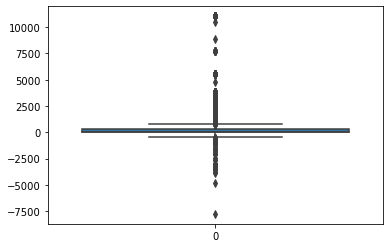

In [220]:
vis_data = pd.read_csv(PATH_to_file+"train.csv", encoding = 'ISO-8859-1', low_memory = False)
print(f"пропущенных значений := {(vis_data.balance_due.isna()).sum()}")
sns.boxplot( data=vis_data['balance_due'])

25-й перцентиль: 0.0, 75-й перцентиль: 305.0, IQR: 305.0,  Границы выбросов: [-457.5, 762.5].


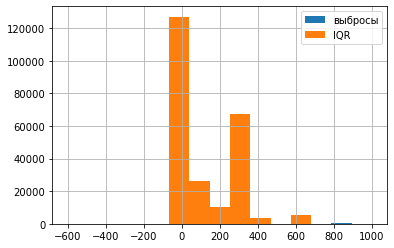

In [223]:
median = vis_data.balance_due.median()
IQR = vis_data.balance_due.quantile(0.75) - vis_data.balance_due.quantile(0.25)
perc25 = vis_data.balance_due.quantile(0.25)
perc75 = vis_data.balance_due.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
left_limit = perc25 - 1.5*IQR
right_limit = perc75 + 1.5*IQR

vis_data.balance_due.loc[(vis_data.balance_due <= 1000) & (vis_data.balance_due >= -600)].hist(alpha = 1, bins = 15, range = (-600, 1000),label = 'выбросы')

vis_data.balance_due.loc[vis_data.balance_due.between(left_limit, right_limit)].hist(bins = 15, 
                                                                            range = (-600, 1000),
                                                                            label = 'IQR')

plt.legend();

In [226]:
outliers = vis_data.balance_due[(vis_data.balance_due >= left_limit) | (vis_data.balance_due <= -right_limit)]

temp = outliers.max()-outliers.min()
task = "2.14.5"
print(f"Ответ к заданию {task} пункт 2")
print(f"модуль разницы между минимальным и максимальным выбросом := {round(temp,2)}")

Ответ к заданию 2.14.5 пункт 2
модуль разницы между минимальным и максимальным выбросом := 18780.0
